In [1]:
import time
import networkx as nx
import numpy as np
import pickle
import importlib
import regraph

from regraph import Rule, plot_rule, clone_node
from regraph.neo4j.graphs import Neo4jGraph
from regraph.neo4j.cypher_utils import *

In [2]:
ns = [int(i) for i in np.logspace(5, 8, 20, base=2)]

In [3]:
ns

[32,
 35,
 39,
 44,
 49,
 55,
 61,
 68,
 76,
 85,
 95,
 106,
 118,
 132,
 148,
 165,
 184,
 205,
 229,
 256]

In [4]:
logspace_fully_connected_graphs = []
for n in ns:
    print(n)
    g = nx.DiGraph()
    nodelist = ["n" + str(nn + 1)for nn in range(n)]
    g.add_nodes_from(nodelist)
    edges = []
    for n1 in nodelist:
        for n2 in nodelist:
            edges.append((n1, n2))
            edges.append((n2, n1))
    g.add_edges_from(edges)
    logspace_fully_connected_graphs.append(g)

32
35
39
44
49
55
61
68
76
85
95
106
118
132
148
165
184
205
229
256


In [6]:
nx_statistics = {
    "clone": [],
    "merge": [],
    "add_node": [],
    "add_edge": [],
    "remove_node": [],
    "remove_edge": []
}
neo4j_statistics = {
    "full_clone": [],
    "no_id_gen_clone": [],
#     "no_ignore_edges_clone": [],
    "merge": [],
    "add_node": [],
    "add_edge": [],
    "remove_node": [],
    "remove_edge": []
}
neo4j_g = Neo4jGraph("bolt://localhost:7687", "neo4j", "admin")
for graph in logspace_fully_connected_graphs:
    print("\n\n\nGraph of size: ", len(graph.nodes()))
    print()
#     graph = nx.relabel_nodes(g, {n: "n" + str(n) for n in g.nodes()})

    # dump graph into 'graph.csv'
    with open('/var/lib/neo4j/import/graph.csv', "w+") as f:
        f.write("uId,vId\n")
        for u, v in graph.edges():
            f.write("{},{}\n".format(u, v))

    # load csv into neo4j database
    neo4j_g.clear()
    load_csv_query =\
        "LOAD CSV WITH HEADERS FROM 'file:///graph.csv' AS csvLine " +\
        "MERGE (u:node {id: csvLine.uId }) " +\
        "MERGE (v:node {id: csvLine.vId }) " +\
        "CREATE (u)-[:edge]->(v) "
    neo4j_g.execute(load_csv_query)
    nodes = graph.nodes()

    # clone 100 random nodes in neo4j graph
    random_nodes = np.random.choice(nodes, 30)
    elapsed_times = []
    for node in random_nodes:
        start = time.time()
        res = neo4j_g.clone_node(node, ignore_naming=True)
        elapsed_times.append(time.time() - start)
    neo4j_statistics["no_id_gen_clone"].append(np.mean(elapsed_times))
  
    
    elapsed_times = []
    for node in random_nodes:
        start = time.time()
        res = neo4j_g.clone_node(node)
        elapsed_times.append(time.time() - start)
    neo4j_statistics["full_clone"].append(np.mean(elapsed_times))
    
    # clone 100 random nodes in nx graph
    elapsed_times = []
    for node in random_nodes:
        start = time.time()
        res = clone_node(graph, node)
        elapsed_times.append(time.time() - start)
    nx_statistics["clone"].append(np.mean(elapsed_times))
    




Graph of size:  32

MATCH (x:node { id : 'n5' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n28' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x 

MATCH (x:node { id : 'n10' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n12' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node)

MATCH (x:node { id : 'n5' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n5'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n5' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n28' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (

MATCH (x:node { id : 'n3' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n3'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n3' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n14' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (

MATCH (x:node { id : 'n7' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n7'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n7' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n18' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (




Graph of size:  35

MATCH (x:node { id : 'n27' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n18' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x

MATCH (x:node { id : 'n32' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n26' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node)

MATCH (x:node { id : 'n18' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n18'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n18' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n5' }) WITH [] as ignoredNodes, x OPTIONAL MATCH

MATCH (x:node { id : 'n6' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n6'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n6' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n14' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (

MATCH (x:node { id : 'n12' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n12'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n12' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n10' }) WITH [] as ignoredNodes, x OPTIONAL MATC




Graph of size:  39

MATCH (x:node { id : 'n27' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n27' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x

MATCH (x:node { id : 'n27' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n22' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node)

MATCH (x:node { id : 'n10' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n27' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n27'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1

MATCH (x:node { id : 'n27' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n27'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n27' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n13' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n6' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n6'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n6' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n15' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (

MATCH (x:node { id : 'n10' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n10'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n10' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n17' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n44' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n40' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node)

MATCH (x:node { id : 'n31' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n28' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node)

MATCH (x:node { id : 'n30' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n30'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n30' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n37' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n24' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n24'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n24' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n15' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n30' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n30'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n30' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n32' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n11' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n28' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node)

MATCH (x:node { id : 'n32' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n17' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node)

MATCH (x:node { id : 'n27' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n27'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n27' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n5' }) WITH [] as ignoredNodes, x OPTIONAL MATCH

MATCH (x:node { id : 'n35' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n35'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n35' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n10' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n32' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n32'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n32' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n17' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n55' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n36' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node)

MATCH (x:node { id : 'n45' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n25' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node)

MATCH (x:node { id : 'n28' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n28'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n28' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n18' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n42' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n42'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n42' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n41' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n41' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n41'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n41' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n7' }) WITH [] as ignoredNodes, x OPTIONAL MATCH

MATCH (x:node { id : 'n38' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n38'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n38' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n30' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n36' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n29' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node)

MATCH (x:node { id : 'n58' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n31' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node)

MATCH (x:node { id : 'n30' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n30'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n30' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n41' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n13' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n13'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n13' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n20' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n58' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n58'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n58' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n58' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n15' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n38' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node)

MATCH (x:node { id : 'n2' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n3' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) S

MATCH (x:node { id : 'n56' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n56'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n56' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n55' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n4' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n4'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n4' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n36' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (

MATCH (x:node { id : 'n3' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n3'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n3' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n60' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (




Graph of size:  76

MATCH (x:node { id : 'n53' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n29' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x

MATCH (x:node { id : 'n34' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n75' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node)

MATCH (x:node { id : 'n7' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n19' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) 

MATCH (x:node { id : 'n63' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n63'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n63' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n46' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n66' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n66'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n66' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n18' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n30' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n30'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n30' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n60' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n65' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n69' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node)

MATCH (x:node { id : 'n70' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n47' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node)

MATCH (x:node { id : 'n74' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n74'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n74' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n44' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n62' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n62'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n62' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n39' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n70' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n70'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n70' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n47' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n95' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n68' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node)

MATCH (x:node { id : 'n8' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n16' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) 

MATCH (x:node { id : 'n64' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n64'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n64' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n9' }) WITH [] as ignoredNodes, x OPTIONAL MATCH

MATCH (x:node { id : 'n4' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n4'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n4' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n74' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (

MATCH (x:node { id : 'n94' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n94'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n94' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n67' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n11' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n11'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n11' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n73' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n4' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n77' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) 

MATCH (x:node { id : 'n101' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n86' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node

MATCH (x:node { id : 'n1' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n1'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n1' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n45' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (

MATCH (x:node { id : 'n69' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n69'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n69' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n90' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n101' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n101'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n101' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n86' }) WITH [] as ignoredNodes, x OPTIONAL M

MATCH (x:node { id : 'n92' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n99' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node)

MATCH (x:node { id : 'n31' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n49' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node)

MATCH (x:node { id : 'n79' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n79'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n79' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n80' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n41' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n41'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n41' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n108' }) WITH [] as ignoredNodes, x OPTIONAL MAT

MATCH (x:node { id : 'n96' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n96'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n96' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n86' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n70' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n70'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n70' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n42' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n24' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n75' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node)

MATCH (x:node { id : 'n110' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n41' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node

MATCH (x:node { id : 'n38' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n38'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n38' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n129' }) WITH [] as ignoredNodes, x OPTIONAL MAT

MATCH (x:node { id : 'n43' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n43'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n43' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n20' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n90' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n90'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n90' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n110' }) WITH [] as ignoredNodes, x OPTIONAL MAT

MATCH (x:node { id : 'n120' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n95' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node

MATCH (x:node { id : 'n78' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n67' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node)

MATCH (x:node { id : 'n64' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n64'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n64' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n76' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n135' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n135'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n135' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n64' }) WITH [] as ignoredNodes, x OPTIONAL M

MATCH (x:node { id : 'n67' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n67'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n67' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n63' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n119' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n119'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n119' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 



Graph of size:  165

MATCH (x:node { id : 'n13' }) WITH [] as ig

MATCH (x:node { id : 'n154' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n51' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node

MATCH (x:node { id : 'n140' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n64' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node

MATCH (x:node { id : 'n145' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n145'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n145' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n91' }) WITH [] as ignoredNodes, x OPTIONAL M

MATCH (x:node { id : 'n53' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n53'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n53' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n153' }) WITH [] as ignoredNodes, x OPTIONAL MAT

MATCH (x:node { id : 'n97' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n97'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n97' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n140' }) WITH [] as ignoredNodes, x OPTIONAL MAT

MATCH (x:node { id : 'n137' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n11' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node

MATCH (x:node { id : 'n157' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n176' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:nod

MATCH (x:node { id : 'n164' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n164'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n164' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n127' }) WITH [] as ignoredNodes, x OPTIONAL 

MATCH (x:node { id : 'n1' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n1'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n1' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n89' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (

MATCH (x:node { id : 'n176' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n176'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n176' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n168' }) WITH [] as ignoredNodes, x OPTIONAL 




Graph of size:  205

MATCH (x:node { id : 'n165' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n131' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred

MATCH (x:node { id : 'n177' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n73' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node

MATCH (x:node { id : 'n38' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n179' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node

MATCH (x:node { id : 'n25' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n25'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n25' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n60' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n18' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n18'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n18' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n24' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n7' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n7'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n7' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n26' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (

MATCH (x:node { id : 'n89' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n84' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node)

MATCH (x:node { id : 'n85' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n46' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node)

MATCH (x:node { id : 'n7' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n7'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n7' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n85' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (

MATCH (x:node { id : 'n79' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n79'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n79' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n95' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n85' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n85'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n85' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n46' }) WITH [] as ignoredNodes, x OPTIONAL MATC

MATCH (x:node { id : 'n161' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n168' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:nod

MATCH (x:node { id : 'n97' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node) SET new_node.id = toString(id(new_node)) WITH new_node, filtPred, filtSucc, toString(id(new_node)) as uid, x FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n201' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x WITH filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x CREATE (new_node:node

MATCH (x:node { id : 'n104' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n104'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n104' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n96' }) WITH [] as ignoredNodes, x OPTIONAL M

MATCH (x:node { id : 'n122' }) WITH [] as ignoredNodes, x OPTIONAL MATCH (x)-[:edge]->(succ) OPTIONAL MATCH (pred)-[:edge]->(x) WITH collect(succ) as listSucc, collect(pred) as listPred, ignoredNodes as ig, x OPTIONAL MATCH (same_id_node:node { id : 'n122'}) WITH same_id_node, listSucc, listPred, ig,  CASE WHEN same_id_node IS NOT NULL THEN (coalesce(same_id_node.count, 0) + 1) ELSE 0 END AS same_id_node_new_count, x WITH same_id_node, same_id_node_new_count, 'n122' + CASE WHEN same_id_node_new_count <> 0 THEN toString(same_id_node_new_count) ELSE '' END as uid, filter(varNode in listSucc WHERE NOT (varNode.id in ig)) AS filtSucc, filter(varNode in listPred WHERE NOT (varNode.id in ig)) AS filtPred, x MERGE (new_node:node {id : uid }) SET same_id_node.count = same_id_node_new_count + 1 FOREACH (succ in filtSucc | MERGE (new_node)-[:edge]->(succ)) FOREACH (pred in filtPred | MERGE (pred)-[:edge]->(new_node)) RETURN uid 
MATCH (x:node { id : 'n80' }) WITH [] as ignoredNodes, x OPTIONAL M

KeyboardInterrupt: 

Exception ignored in: 'neo4j.bolt._io.ChunkedInputBuffer.receive'
Traceback (most recent call last):
  File "/home/eugenia/anaconda3/lib/python3.6/ssl.py", line 1009, in recv_into
    return self.read(nbytes, buffer)
  File "/home/eugenia/anaconda3/lib/python3.6/ssl.py", line 871, in read
    return self._sslobj.read(len, buffer)
  File "/home/eugenia/anaconda3/lib/python3.6/ssl.py", line 631, in read
    v = self._sslobj.read(len, buffer)
KeyboardInterrupt: 


ServiceUnavailable: Failed to read from defunct connection Address(host='127.0.0.1', port=7687)

In [12]:
len(neo4j_statistics["no_id_gen_clone"])

20

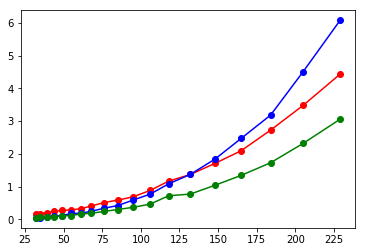

In [ ]:
y2 = neo4j_statistics["no_id_gen_clone"]

In [28]:
y3
= nx_statistics["clone"]

In [29]:
x = ns